In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 解題步驟：

1. 將 train.csv, test.csv 合併
2. 取出 LotFrontage, GarageYrBlt, MasVnrArea 三個特徵的資料
3. 分別以平均值及中位數來填補缺失值
4. 分析缺失值，練習繪製直方圖及機率圖 (如下圖)
5. 分別計算原本、以平均值填補、以中位數填補的標準差
6. 課後問答

<img src="./data/hist_plot.png" style="zoom:100%;" />

## Hint

* [pandas.DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
* [seaborn.histplot](


## 讀取資料

In [2]:
""" Your code hear: 讀取 train.csv, test.csv 並合併 """
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
concat = pd.concat([train,test])

C:\Users\Watson\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


## 分離目標

In [3]:
# 將目標分析欄位取出來
train_ta = train[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']]
target = concat[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']]
target_median = target.copy()
target_mean = target.copy()
for col in target_mean.columns:
    mean = train_ta[col].mean()
    median = train_ta[col].median()
    target_mean[col].fillna(mean,inplace=True)
    target_median[col].fillna(median,inplace=True)

## 繪圖

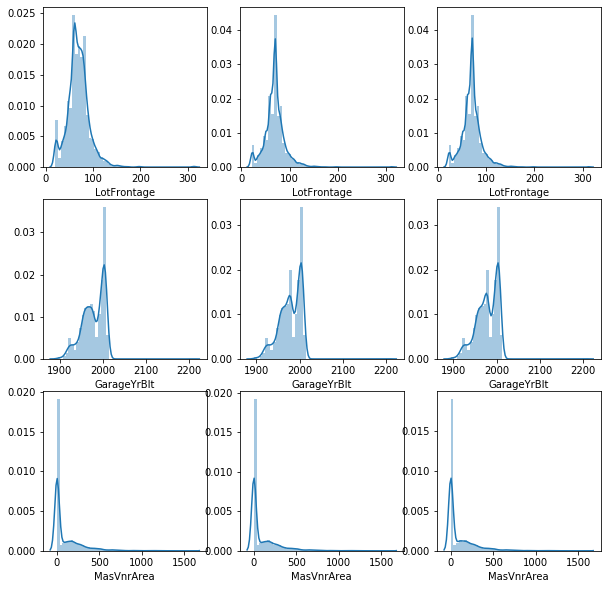

In [4]:
# 繪圖
""" Your code hear: """
fig = plt.figure(figsize=(10,10)) 
plt.subplot(331)
sns.distplot(target['LotFrontage'].dropna())
plt.subplot(332)
sns.distplot(target_median['LotFrontage'])
plt.subplot(333)
sns.distplot(target_mean['LotFrontage'])
plt.subplot(334)
sns.distplot(target['GarageYrBlt'].dropna())
plt.subplot(335)
sns.distplot(target_median['GarageYrBlt'])
plt.subplot(336)
sns.distplot(target_mean['GarageYrBlt'])
plt.subplot(337)
sns.distplot(target['MasVnrArea'].dropna())
plt.subplot(338)
sns.distplot(target_median['MasVnrArea'])
plt.subplot(339)
sns.distplot(target_mean['MasVnrArea'])

## 分析標準差

In [5]:
""" Your code hear: """
for col in target.columns:
    print(col+':')
    print('original: ',target[col].std())
    print('mean: ',target_mean[col].std())
    print('median: ',target_median[col].std())
    print('----------------------')

LotFrontage:
original:  23.48212375026185
mean:  21.476297155394306
median:  21.47585477609762
----------------------
GarageYrBlt:
original:  25.76915758344754
mean:  25.026957547334977
median:  25.030502259030072
----------------------
MasVnrArea:
original:  179.16532073121385
mean:  178.3918031282418
median:  178.6423786511871
----------------------


## 透過分析標準差可以得到什麼結果？

In [6]:
#填補缺失值會讓資料更集中因此使標準差較大，而兩種填補方式的標準差大小會因原本資料分布而有差異